# Neural networks

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

In [2]:
from sklearn import preprocessing
import numpy as np

In [3]:
features = np.array([[-100.1, 3240.10],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

In [4]:
scaler = preprocessing.StandardScaler()
features_standardized = scaler.fit_transform(features)

In [5]:
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [6]:
print("Average:", round(features_standardized[:, 0].mean()))
print("Std:", round(features_standardized[:, 0].std()))

Average: 0
Std: 1


### Neural Network design

In [7]:
from keras import models
from keras import layers

In [8]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))
# 2 layers neural network for classification (1 output layer with sigmoid activator)

In [9]:
network.compile(
    loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

### Binary classificator training

In [10]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer

In [11]:
np.random.seed(0)

In [12]:
number_of_features = 1000

In [13]:
(data_train, target_train), (data_test, target_test), = imdb.load_data(num_words=number_of_features)
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [14]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [15]:
network.compile(
    loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [16]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 3s 5ms/step - loss: 0.5309 - accuracy: 0.7278 - val_loss: 0.3349 - val_accuracy: 0.8579
Epoch 2/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.8630 - val_loss: 0.3284 - val_accuracy: 0.8603
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 0.3082 - accuracy: 0.8731 - val_loss: 0.3267 - val_accuracy: 0.8599


In [17]:
features_train.shape

(25000, 1000)

### Multiclass classificator training

In [18]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [19]:
np.random.seed(0)

In [20]:
number_of_features = 5000

In [21]:
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

In [22]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

In [23]:
network = models.Sequential()
network.add(layers.Dense(units=100, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=100, activation="relu"))
network.add(layers.Dense(units=46, activation="softmax"))

In [24]:
network.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [25]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
90/90 [==============================] - 2s 11ms/step - loss: 2.0580 - accuracy: 0.5817 - val_loss: 1.1427 - val_accuracy: 0.7382
Epoch 2/3
90/90 [==============================] - 1s 9ms/step - loss: 0.8329 - accuracy: 0.8175 - val_loss: 0.9328 - val_accuracy: 0.7881
Epoch 3/3
90/90 [==============================] - 1s 8ms/step - loss: 0.5338 - accuracy: 0.8868 - val_loss: 0.8813 - val_accuracy: 0.7974


In [26]:
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Regressor training

In [27]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [28]:
np.random.seed(0)

In [29]:
features, target = make_regression(n_samples=10_000,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=0.0,
                                   random_state=0)

In [30]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33, random_state=0)

In [31]:
network = models.Sequential()
network.add(layers.Dense(units=32, activation="relu", input_shape=(features_train.shape[1],)))
network.add(layers.Dense(units=32, activation="relu"))
network.add(layers.Dense(units=1))

In [32]:
network.compile(
    loss="mse",
    optimizer="RMSprop",
    metrics=["mse"])

In [33]:
history = network.fit(features_train, target_train, epochs=10, verbose=1, batch_size=100, validation_data=(features_test, target_test))

Epoch 1/10
67/67 [==============================] - 1s 3ms/step - loss: 17288.8662 - mse: 17288.8662 - val_loss: 17595.9316 - val_mse: 17595.9316
Epoch 2/10
67/67 [==============================] - 0s 2ms/step - loss: 16452.4534 - mse: 16452.4534 - val_loss: 16208.1719 - val_mse: 16208.1719
Epoch 3/10
67/67 [==============================] - 0s 2ms/step - loss: 15238.6095 - mse: 15238.6095 - val_loss: 13972.4170 - val_mse: 13972.4170
Epoch 4/10
67/67 [==============================] - 0s 2ms/step - loss: 12995.7135 - mse: 12995.7135 - val_loss: 10887.2324 - val_mse: 10887.2324
Epoch 5/10
67/67 [==============================] - 0s 2ms/step - loss: 9697.1667 - mse: 9697.1667 - val_loss: 7294.2837 - val_mse: 7294.2837
Epoch 6/10
67/67 [==============================] - 0s 2ms/step - loss: 6191.3569 - mse: 6191.3569 - val_loss: 3786.9917 - val_mse: 3786.9917
Epoch 7/10
67/67 [==============================] - 0s 2ms/step - loss: 2825.4751 - mse: 2825.4751 - val_loss: 1217.7778 - val_mse: 

### Predictions

In [34]:
np.random.seed(0)

In [35]:
number_of_features = 10_000

In [36]:
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [37]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [38]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [39]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [40]:
history = network.fit(features_train, target_train, epochs=3, verbose=1, batch_size=100, validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 3s 11ms/step - loss: 0.4878 - accuracy: 0.7758 - val_loss: 0.2827 - val_accuracy: 0.8889
Epoch 2/3
250/250 [==============================] - 2s 7ms/step - loss: 0.2105 - accuracy: 0.9244 - val_loss: 0.2936 - val_accuracy: 0.8838
Epoch 3/3
250/250 [==============================] - 2s 6ms/step - loss: 0.1695 - accuracy: 0.9387 - val_loss: 0.3250 - val_accuracy: 0.8776


In [41]:
predicted_target = network.predict(features_test)

In [42]:
predicted_target[0]

array([0.08702761], dtype=float32)

### Training history visualization

In [43]:
import matplotlib.pyplot as plt

In [44]:
np.random.seed(0)

In [45]:
number_of_features = 10_000

In [46]:
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [47]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [48]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [49]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [50]:
history = network.fit(
    features_train,
    target_train,
    epochs=15,
    verbose=0,
    batch_size=1000,
    validation_data=(features_test, target_test))

In [51]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [52]:
epoch_count =  range(1, len(training_loss) + 1)

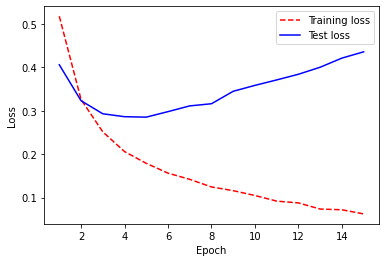

In [53]:
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

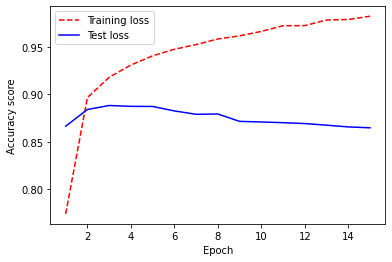

In [54]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

### Reducing overfitting by regularizing weights

In [55]:
from keras import regularizers

In [56]:
number_of_features = 1000

In [57]:
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

In [58]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [59]:
network = models.Sequential()
network.add(layers.Dense(
    units=16,
    activation="relu",
    kernel_regularizer=regularizers.l2(0.01),
    input_shape=(number_of_features,)))
network.add(layers.Dense(
    units=16,
    kernel_regularizer=regularizers.l2(0.01),
    activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [60]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [61]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 1s 3ms/step - loss: 0.7875 - accuracy: 0.7446 - val_loss: 0.4946 - val_accuracy: 0.8509
Epoch 2/3
250/250 [==============================] - 1s 2ms/step - loss: 0.4764 - accuracy: 0.8543 - val_loss: 0.4501 - val_accuracy: 0.8571
Epoch 3/3
250/250 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.8613 - val_loss: 0.4353 - val_accuracy: 0.8560


### Reducing overfitting by early stop

In [62]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [63]:
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
             monitor="val_loss",
             save_best_only=True)]

In [64]:
history = network.fit(
    features_train,
    target_train,
    epochs=20,
    callbacks=callbacks,
    verbose=0,
    batch_size=100,
    validation_data=(features_test, target_test))

### Reducing overfitting by dropouts

In [65]:
network = models.Sequential()
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [66]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [67]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    verbose=0,
    batch_size=100,
    validation_data=(features_test, target_test))

### Saving of model training

In [68]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [69]:
network.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [70]:
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

In [71]:
history = network.fit(
    features_train,
    target_train,
    epochs=3,
    callbacks=checkpoint,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, target_test))

Epoch 1/3
250/250 [==============================] - 1s 3ms/step - loss: 0.5199 - accuracy: 0.7510 - val_loss: 0.3470 - val_accuracy: 0.8537
Epoch 2/3
250/250 [==============================] - 1s 3ms/step - loss: 0.3294 - accuracy: 0.8593 - val_loss: 0.3299 - val_accuracy: 0.8600
Epoch 3/3
250/250 [==============================] - 1s 3ms/step - loss: 0.3081 - accuracy: 0.8743 - val_loss: 0.3252 - val_accuracy: 0.8618


### K-block cross-validation check of networks

In [72]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [73]:
number_of_features = 100

In [74]:
features, target = make_classification(n_samples=10_000,
                                       n_features=number_of_features,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=2,
                                       weights=[.5, .5],
                                       random_state=0)

In [75]:
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
    network.add(layers.Dense(units=16, activation="relu"))
    network.add(layers.Dense(units=1, activation="sigmoid"))
    network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return network

In [76]:
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=0)

In [77]:
cross_val_score(neural_network, features, target, cv=3)

array([0.88962209, 0.89318931, 0.85718572])